## Gravitational Lensing

A two dimensional example using point lenses. 

The lens equation is $\beta = \theta - \alpha(\theta)$, where $\beta$ is the angle of the source position, $\theta$ is the angle of the image position (on the image plane, between the source plane and the observer) and $\alpha$ is the deflection angle. 

Deflection angle is of the magnitude: $\alpha(b) = \frac{4 G M}{c^2 b}$

The Einstein Radius is the radius of the deformed image for a point mass source directly behind the lens along the line of sight. The ring radius is given as $\theta_E = \sqrt{ \frac{4GM}{c^2} \frac{D_{LS}}{D_L \, D_S} }$

In dimensionless form, the deflection angle vector is shown as $\alpha(\theta) = \theta_E^2 \frac{\theta}{\vert\theta\vert^2}$


In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.size"] = 12

### Two dimensional lensing

The image seen from a point lens is plotted here, where the position of the background source is slightly off the line of sight. 

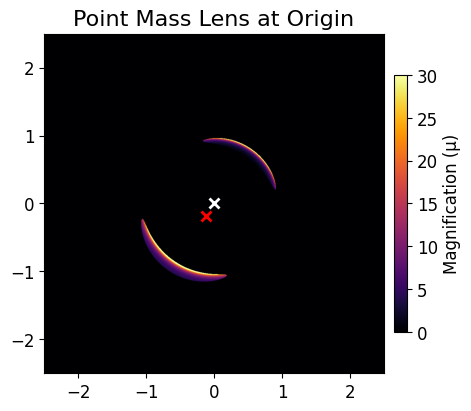

In [3]:

# Use constrained_layout for better spacing
fig = plt.figure(figsize=(6, 4), constrained_layout=True)

theta_E = 1.0  
source_radius = 0.15
grid_size = 1000
fov = 2.5  # Field of view

position = [-0.12, -0.18]

x = np.linspace(-fov, fov, grid_size)
y = np.linspace(-fov, fov, grid_size)
X, Y = np.meshgrid(x, y)
theta = np.stack([X, Y], axis=-1)

r2 = X**2 + Y**2
epsilon = 1e-6  
alpha = theta_E**2 * theta / (r2[..., None] + epsilon)
beta = theta - alpha

d_source = np.linalg.norm(beta - position, axis=-1)
image = d_source <= source_radius

mu = 1 / ((1 - theta_E**4 / (r2**2 + epsilon))**2)
mu_clipped = np.clip(mu, 0, 30)

brightness = image * mu_clipped

# Create an Axes object properly
ax = fig.add_subplot(1, 1, 1)

# Show image
im = ax.imshow(
    brightness,
    extent=(-fov, fov, -fov, fov),
    origin='lower',
    cmap='inferno'
)

# Plot lens and source
ax.plot(0, 0, marker='x', color='white', markersize=7, markeredgewidth=2) 
ax.plot(position[0], position[1], marker='x', color='red', markersize=7, markeredgewidth=2)

ax.grid(False)

# Add colorbar
cbar = fig.colorbar(im, ax=ax, orientation='vertical', fraction=0.025, pad=0.02)
cbar.set_label("Magnification (μ)")

# Add title
ax.set_title("Point Mass Lens at Origin", fontsize=16)

plt.show()


Next, the two dimensional lensing for sources and point lenses at various location is shown. The sources are at various positions according the image plane, to give some intuition of how lensing behaves for point masses. 

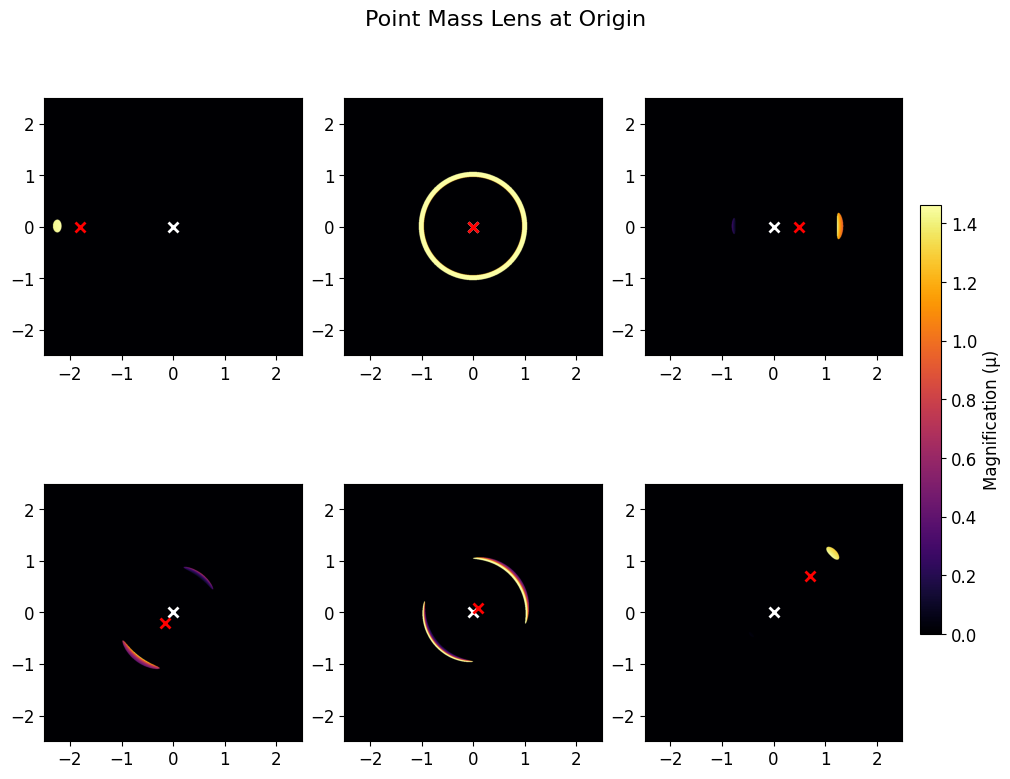

In [4]:
# Use constrained_layout for better spacing
fig = plt.figure(figsize=(10, 8), constrained_layout=True)

theta_E = 1.0  
source_radius = 0.1
grid_size = 1000
fov = 2.5  # Field of view

positions = [
    [-1.8, 0.0], [0, 0], [0.5, 0.0], 
    [-0.15, -0.2], [0.1, 0.08], [np.sqrt(0.5), np.sqrt(0.5)]
]

axes = []
im = None  # placeholder for colorbar

for i, p in enumerate(positions): 
    x = np.linspace(-fov, fov, grid_size)
    y = np.linspace(-fov, fov, grid_size)
    X, Y = np.meshgrid(x, y)
    theta = np.stack([X, Y], axis=-1)

    r2 = X**2 + Y**2
    epsilon = 1e-6  
    alpha = theta_E**2 * theta / (r2[..., None] + epsilon)
    beta = theta - alpha

    d_source = np.linalg.norm(beta - p, axis=-1)
    image = d_source <= source_radius

    mu = 1 / ((1 - theta_E**4 / (r2**2 + epsilon))**2)
    mu_clipped = np.clip(mu, 0, 30)

    brightness = image * mu_clipped

    ax = plt.subplot(2, 3, i + 1)
    im = ax.imshow(
        brightness,
        extent=(-fov, fov, -fov, fov),
        origin='lower',
        cmap='inferno'
    )
    ax.plot(0, 0, marker='x', color='white', markersize=7, markeredgewidth=2) 
    ax.plot(p[0], p[1], marker='x', color='red', markersize=7, markeredgewidth=2)
    ax.grid(False)
    axes.append(ax)

# Add shared colorbar outside
cbar = fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.025, pad=0.02)
cbar.set_label("Magnification (μ)")

# Add title
fig.suptitle("Point Mass Lens at Origin", fontsize=16) 
plt.show() 

## Time-delay surface

Just like Snell's law, gravitational lensing means that light travels along the path of minimum action, or on extremal paths. The time delay surface, suing the Fermat potential, allows us to visualise the extrema of this siurface in order to determine the image poisitions. 

The lower the curvature the higher the magnification. This means that the image which occurs at the origin of the frame, where the lens is, gets demagnified out due to its high curvature. 

The difference in the height of the points corresponds to the difference in arrival times of the images. If the source is intrinsically variable, like a periodic quasar or pulsating star, the difference in times can be used to determine the Hubble constant $H_0$, since the system then only depends on the system scale which depends on the Hubble constant. 

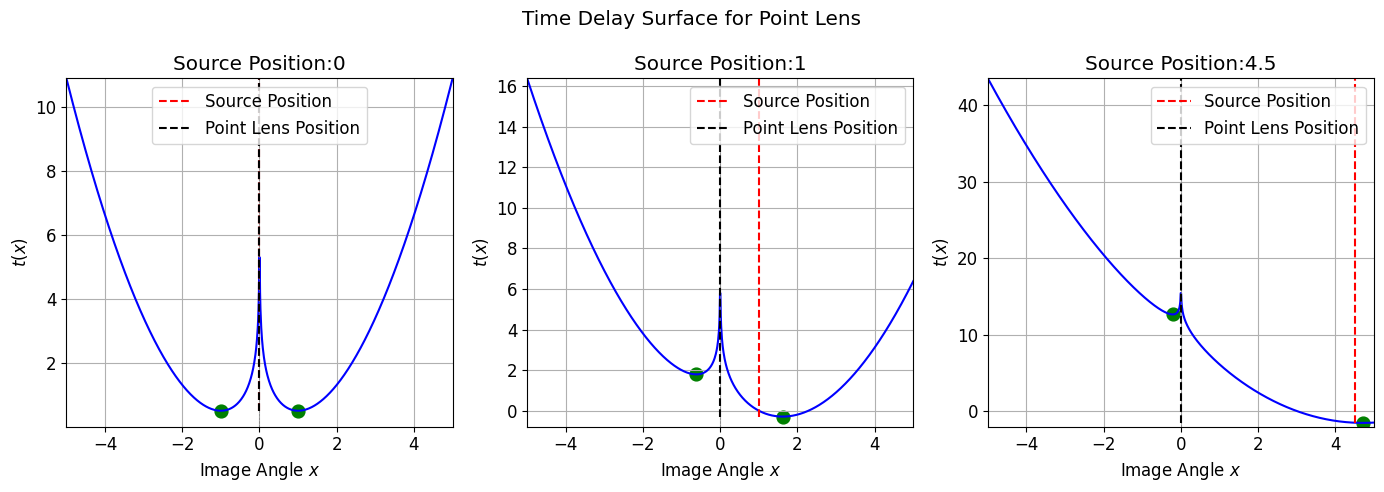

In [5]:
plt.figure(figsize=(14,5))

source_positions = [0, 1, 4.5]

for (i,sp) in enumerate(source_positions):
    plt.subplot(1,3,i+1)
    y = sp   
    x = np.linspace(-5, 5, 1000)
    x_nonzero = np.where(x == 0, 1e-6, x)  # avoid log(0)

    psi = np.log(np.abs(x_nonzero))

    t_x = 0.5 * (x - y)**2 - psi 

    plt.plot(x, t_x, color='blue')

    extrema = np.where( (t_x[1:-1] < t_x[:-2]) & (t_x[1:-1] < t_x[2:]) )[0] + 1
    extrema_points = np.array( [ [x[i], t_x[i]] for i in extrema ]).T
    plt.scatter( extrema_points[0], extrema_points[1], color="green", s=85) 

    plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)

    plt.vlines(y, min(t_x), max(t_x), linestyle="--", linewidth=1.5, color="red", label="Source Position")
    plt.vlines(0, min(t_x), max(t_x), linestyle="--", linewidth=1.5, color="black", label="Point Lens Position")

    plt.xlim(min(x), max(x))
    plt.ylim(min(t_x)-0.5, max(t_x))
    plt.xlabel("Image Angle $x$")
    plt.ylabel("$t(x)$")
    plt.grid(True)
    plt.legend(loc="best")
    plt.title("Source Position:"+str(sp))

plt.suptitle("Time Delay Surface for Point Lens")
plt.tight_layout();

### Microlensing 

For small sources and lenses, we can use microlensing to determine the system properties. The overall brightness of a system increases since the magnification increases in lensing. The following shows the light curve for a source moving in the background of a point lens. 

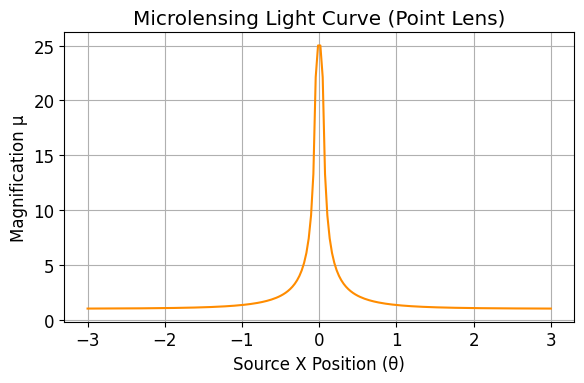

In [6]:
# Constants
theta_E = 1.0  # Einstein radius (angular units)
source_radius = 0.05 #0.1  # Radius of source (in theta units)
n_steps = 200  
v = 0.05  # Source velocity (in theta units per step)

# Source moves along a straight line in the background 
x_positions = np.linspace(-3, 3, n_steps)
y_position = 0.0  

magnifications = []

for x in x_positions:
    beta_x = x
    beta_y = y_position
    beta = np.sqrt(beta_x**2 + beta_y**2)
    
    u = beta / theta_E
    if source_radius == 0: 
        mu = (u**2 + 2) / (u * np.sqrt(u**2 + 4))
    else: 
        u = np.maximum(u, 0.8*source_radius / theta_E)
        mu = (u**2 + 2) / (u * np.sqrt(u**2 + 4))

    magnifications.append(mu)

# Plot light curve
plt.figure(figsize=(6, 4))
plt.plot(x_positions, magnifications, color='darkorange')
plt.xlabel('Source X Position (θ)')
plt.ylabel('Magnification μ')
plt.title('Microlensing Light Curve (Point Lens)')
plt.grid(True)
plt.tight_layout(); 